### Importing all required headers

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

from numpy import loadtxt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold

from sklearn import metrics

from sklearn.model_selection import cross_val_score


### Import data

In [6]:
labels = loadtxt(open("labels.csv","rb"), delimiter=',')
data_full = loadtxt(open("data.csv","rb"), delimiter=',')
data = data_full[:179,:]

### Z scaling

In [7]:
z_scaler = StandardScaler()
data_z = z_scaler.fit_transform(data)

### Zero mean unit variance

In [8]:
data_u = preprocessing.scale(data)

### PCA preprocessing for feature selection

In [9]:
data_zPC = PCA(0.999).fit_transform(X=data_z)
data_uPC = PCA(0.999).fit_transform(X=data_u)

### N fold cross validation for KNN classifier after PCA for K=5 neighbours

In [10]:
import numpy as np

#N fold
KNcv = KNeighborsClassifier(n_neighbors=5)
cvscore = cross_val_score (KNcv,data_zPC,labels, cv=10)
print(cvscore)
print('cvscore mean:{}'.format(np.mean(cvscore)))

[0.89473684 0.94736842 0.89473684 1.         0.94444444 1.
 0.88235294 0.94117647 0.88235294 0.94117647]
cvscore mean:0.9328345373237015


### N fold cross validation for KNN classifier after PCA for K=10 neighbours

In [11]:
import numpy as np

#N fold
KNcv = KNeighborsClassifier(n_neighbors=10)
cvscore = cross_val_score (KNcv,data_uPC,labels, cv=10)
print(cvscore)
print('cvscore mean:{}'.format(np.mean(cvscore)))

[0.89473684 0.89473684 0.84210526 0.88888889 0.94444444 1.
 0.88235294 0.88235294 0.88235294 0.88235294]
cvscore mean:0.8994324045407638


### Find optimal value of k in nearest neighbour

In [12]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

KNcv = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 20),
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(KNcv, param_grid, cv=10, n_jobs = -1)#fit model to data
knn_gscv.fit(data_zPC, labels)

#check top performing n_neighbors value
print(knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)


{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.9553072625698324


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### N fold cross validation for Decision Tree classifier after PCA : Information gain for attribute selection measure, max depth is 10 with best split


In [13]:

from sklearn.model_selection import cross_val_score

DTcv = DecisionTreeClassifier(criterion="entropy", max_depth=10,splitter="random")
cvscore = cross_val_score (DTcv,data_zPC,labels, cv=10)
print(cvscore)
print('cvscore mean:{}'.format(np.mean(cvscore)))

[0.84210526 0.94736842 0.84210526 1.         0.83333333 0.94444444
 0.94117647 0.82352941 0.88235294 0.94117647]
cvscore mean:0.8997592019263847


### N fold cross validation for Decision Tree classifier after PCA : Information gain for attribute selection measure, max depth is 5 with best split

In [15]:

from sklearn.model_selection import cross_val_score

DTcv = DecisionTreeClassifier(criterion="entropy", max_depth=5,splitter="best")
cvscore = cross_val_score (DTcv,data_zPC,labels, cv=10)
print(cvscore)
print('cvscore mean:{}'.format(np.mean(cvscore)))

[0.73684211 0.94736842 0.78947368 0.83333333 0.88888889 1.
 1.         0.88235294 1.         0.82352941]
cvscore mean:0.8901788785689714


### N fold cross validation for Decision Tree classifier after PCA : Gini index for attribute selection measure, max depth is 10 with best split

In [16]:

from sklearn.model_selection import cross_val_score

DTcv = DecisionTreeClassifier(criterion="gini", max_depth=5,splitter="best")
cvscore = cross_val_score (DTcv,data_zPC,labels, cv=10)
print(cvscore)
print('cvscore mean:{}'.format(np.mean(cvscore)))

[0.89473684 1.         0.94736842 0.88888889 0.88888889 1.
 0.88235294 0.88235294 0.94117647 0.88235294]
cvscore mean:0.9208118335053319


### N fold cross validation for Decision Tree classifier after PCA : Gini index for attribute selection measure, max depth is 3 with best split

In [17]:

from sklearn.model_selection import cross_val_score

DTcv = DecisionTreeClassifier(criterion="gini", max_depth=3,splitter="best")
cvscore = cross_val_score (DTcv,data_zPC,labels, cv=10)
print(cvscore)
print('cvscore mean:{}'.format(np.mean(cvscore)))

[0.89473684 0.94736842 0.89473684 0.88888889 0.88888889 1.
 1.         0.94117647 1.         0.88235294]
cvscore mean:0.9338149294805642


### N fold cross validation for Decision Tree classifier after PCA : Gini index for attribute selection measure, max depth is 3 with random split

In [18]:

from sklearn.model_selection import cross_val_score

DTcv = DecisionTreeClassifier(criterion="gini", max_depth=3,splitter="random")
cvscore = cross_val_score (DTcv,data_zPC,labels, cv=10)
print(cvscore)
print('cvscore mean:{}'.format(np.mean(cvscore)))

[0.89473684 0.94736842 0.84210526 0.94444444 0.94444444 0.88888889
 0.88235294 0.82352941 0.88235294 0.94117647]
cvscore mean:0.899140006879945


### Find optimal decision tree parameters using fine tuning

In [19]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

KNcv = DecisionTreeClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_depth': np.arange(3, 20),
             'criterion':['gini','entropy'],
             'splitter':['best','random']}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(KNcv, param_grid, cv=10, n_jobs = -1)#fit model to data
knn_gscv.fit(data_zPC, labels)

#check top performing n_neighbors value
print(knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
0.9385474860335196


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


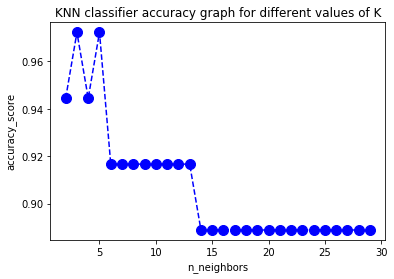

In [68]:
from matplotlib import pyplot as plt
import numpy as np 

data_train, data_test, labels_train, labels_test = train_test_split(data, labels,
                                                        test_size=0.2,
                                                        random_state = 42)
accvar = []

for i in range (2,30):
    labels_pred = KNeighborsClassifier(n_neighbors=i).fit(data_train, labels_train).predict(data_test)
    #rint("i:",i)
    accvar.append(metrics.accuracy_score(labels_test, labels_pred))
    #rint("Accuracy:",metrics.accuracy_score(labels_test, labels_pred))
    

plt.plot( range(2, 30),accvar,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('KNN classifier accuracy graph for different values of K')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy_score')
plt.show()



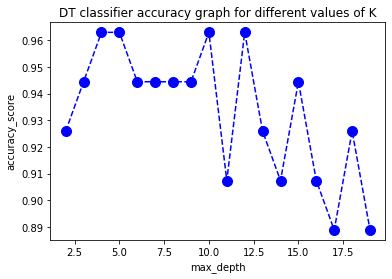

In [81]:
from matplotlib import pyplot as plt
import numpy as np 

data_train, data_test, labels_train, labels_test = train_test_split(data, labels,
                                                        test_size=0.3,
                                                        random_state = 42)
accvar = []

for i in range (2,20):
    labels_pred = DecisionTreeClassifier(max_depth=i,criterion="entropy",splitter="random").fit(data_train, labels_train).predict(data_test)
    #rint("i:",i)
    accvar.append(metrics.accuracy_score(labels_test, labels_pred))
    #rint("Accuracy:",metrics.accuracy_score(labels_test, labels_pred))
    

plt.plot( range(2, 20),accvar,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('DT classifier accuracy graph for different values of K')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.show()
